# Visualizations
There are two primary uses for data visualization:
- to explore data
- to communicate data

# matplotlib

In [7]:
from matplotlib import pyplot as plt

In [162]:
# set fonts in a family
plt.rcParams['font.sans-serif'] = [ 'Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant' ]
print(plt.rcParams['font.sans-serif'])

['Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant']


## rcParams
You can dynamically change the default rc (runtime configuration) settings in a python script or <br>
interactively from the python shell. All rc settings are stored in a dictionary-like variable called <br>
matplotlib.rcParams, which is global to the matplotlib package.<br>

In [27]:
print(plt.rcParams['font.sans-serif'])

['Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant']


In [32]:
plt.rcParams['figure.figsize'] = (10, 8)  # set figure size
plt.rcParams['image.interpolation'] = 'nearest'  # set interpolation
plt.rcParams['font.sans-serif'] = 'Nimbus Sans'  # set font
plt.rcParams['font.size'] = 14  # set font size

## Line Chart
- We can make multiple calls to plt.plot to show multiple series on the same chart

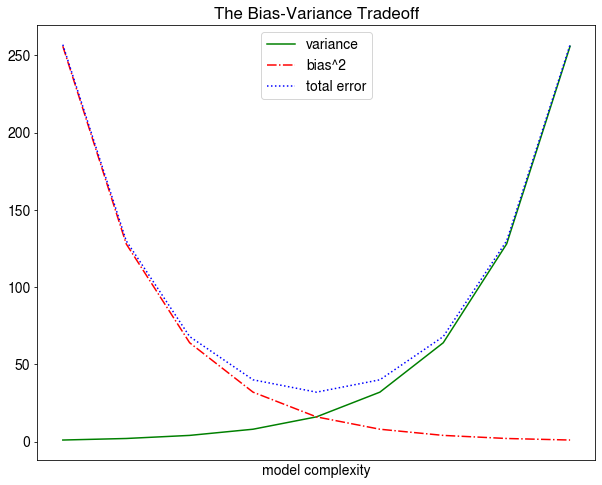

In [33]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line

# Because we've assigned labels to each series, we can get a legend for free 

plt.legend(loc=9) # loc=9 means "top center"
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

## scatterplot
- visualizing the relationship between two paired sets of data
- trendline with numpy ployfit() & poly1d()

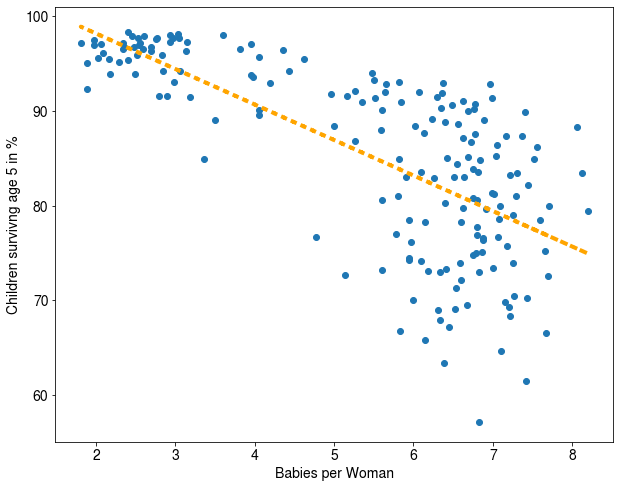

In [58]:
import pandas as pd
import numpy as np

gapminder = pd.read_csv('data/gapminder.csv')
x = gapminder[gapminder.year == 1965]['babies_per_woman']
y = gapminder[gapminder.year == 1965]['age5_surviving']

# add a trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),  color="orange", linewidth=4, linestyle=":")

plt.scatter(x, y)
plt.xlabel('Babies per Woman')
plt.ylabel('Children survivng age 5 in %')
plt.show()

## bar plot
- show how some quantity varies among some discrete set of items

In [107]:
germany = gapminder[(gapminder.country == 'Germany') & (gapminder.year > 2000)].life_expectancy.mean()
japan = gapminder[(gapminder.country == 'Japan') & (gapminder.year > 2000)].life_expectancy.mean()
nepal = gapminder[(gapminder.country == 'Nepal') & (gapminder.year > 2000)].life_expectancy.mean()
honduras = gapminder[(gapminder.country == 'Honduras') & (gapminder.year > 2000)].life_expectancy.mean()
russia = gapminder[(gapminder.country == 'Russia') & (gapminder.year > 2000)].life_expectancy.mean()
usa = gapminder[(gapminder.country == 'United States') & (gapminder.year > 2000)].life_expectancy.mean()

In [178]:
countries = ['Germany', 'Japan', 'Nepal', 'Honduras', 'Russia', 'USA']
life_expect = [germany, japan, nepal, honduras, russia, usa]
life_df_2000 = pd.DataFrame( {'Country': countries, 'Mean Life Expactancy after 2000': life_expect, })
life_df_2000

,Country,Mean Life Expactancy after 2000
0,Germany,79.846667
1,Japan,82.386667
2,Nepal,68.253333
3,Honduras,71.726667
4,Russia,67.853333
5,USA,78.213333


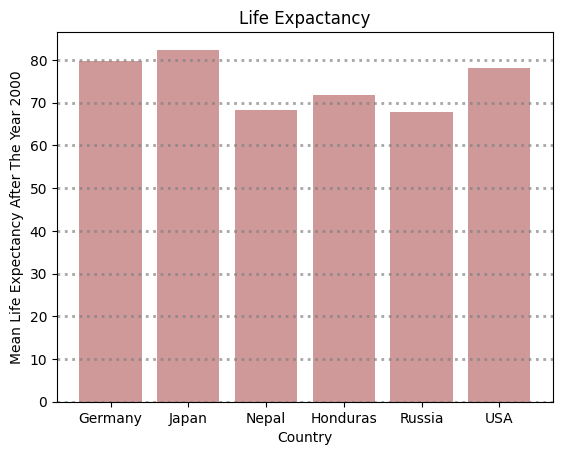

In [209]:
plt.bar(life_df_2000.iloc[:, 0], life_df_2000.iloc[:, 1], color='darkred', alpha=0.4)
plt.grid(color='grey', linestyle=':', linewidth=2, axis='y', alpha=0.7)
plt.title('Life Expactancy')
plt.xlabel('Country')
plt.ylabel('Mean Life Expectancy After The Year 2000')
plt.show()

In [228]:
from matplotlib import rc
plt.matplotlib.rc_file_defaults()  # reset defaults
plt.rcParams['font.sans-serif'] = [ 'Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant' ]
plt.rcParams['font.sans-serif'] = 'Fira Sans'  # set font
plt.rcParams['font.size'] = 11  # set font size

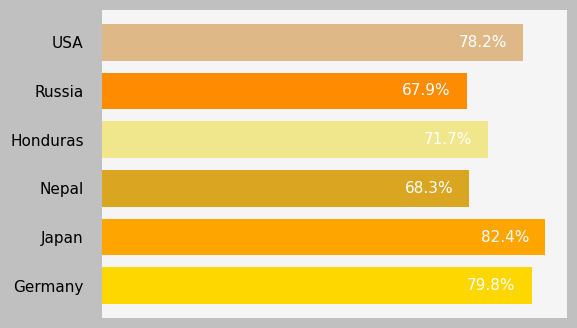

In [246]:
colors = ["gold", "orange", "goldenrod", "khaki", "darkorange", 'burlywood']

fig, ax = plt.subplots(figsize=(6, 4), facecolor="silver")  # figure color
ax.set_facecolor('whitesmoke')  # axis color
ax.spines[:].set_visible(False)  # remove axis
ax.tick_params(labelbottom=False, bottom=False, left=False, pad=10)  # manipulate ticks and labels

for i in range(6):
    ax.barh(life_df_2000.iloc[i, 0], life_df_2000.iloc[i, 1], height=0.75, color=colors[i])
    ax.text( life_df_2000.iloc[i, 1] - 3,  # X location of text (with adjustment)
        life_df_2000.iloc[i, 0],  # Y location
        s=f'{round(life_df_2000.iloc[i, 1] ,1)}%',  # Required label with formatting
        va='center',  # Vertical alignment
        ha='right',  # Horizontal alignment
        color='white',  # Font colour and size
        size=11)


In [247]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
Counter(min(grade // 10 * 10, 90) for grade in grades)


Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})